# Lesson 2: Fourier Transform

## Notations

Let $A\in\mathbb{C}^{M\times N}$, then its **conjugate transpose** is $A^*$ and its **transpose** is $A^T$.

In [1]:
import numpy as np

In [13]:
A = np.array([[1+1j,1,0]]);print(A.T);print(np.asmatrix(A).H)

[[1.+1.j]
 [1.+0.j]
 [0.+0.j]]
[[1.-1.j]
 [1.-0.j]
 [0.-0.j]]


## 1D Fourier Transform

Let $F_n$ be the unitary $n\times n$ Fourier matrix as
$$F_n=\frac{1}{\sqrt{n}}\begin{bmatrix}1&1&\cdots&1\\
1&\omega&\cdots&\omega^{n-1}\\
\cdots&\cdots&&\cdots\\
1&\omega^{n-1}&\cdots&\omega^{(n-1)^2}\end{bmatrix},$$
where $\omega=e^{-2\pi i/n}$.

The discrete Fourier transform of $x\in\mathbb{C}^n$ is $F_nx$.

Typically, the flop count of an $n\times n$ matrix multiplied by a vector is $O(n^2)$, but $F_nx$ can be computed in $O(n\log n)$ flops, which has a huge computational advantage. So this is also called the Fast Fourier transform.

$F_n$ is unitary as $F_n^*F_n=F_nF_n^*=I_n$ where $I_n$ is the $n\times n$ identity matrix.

**In Python, np.fft.fft(x) = $\sqrt{n}F_nx$, and np.fft.fft(x, norm='ortho') = $F_nx$**

## 2D Fourier Transform

The 2D fourier transform on an $M\times N$ matrix is $F_2(X)=F_MXF_N^T$, and the inverse Fourier transform is $F_2^{-1}(u)=F_1^*(u)=F_m^*u(F_n^*)^T$.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
X = plt.imread('pepper.png')

In [16]:
X.shape

(256, 256)

In [82]:
FX = np.fft.fft2(X)  # 2D fourier transform

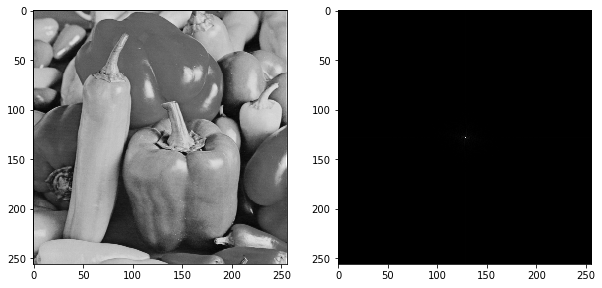

In [60]:
# showing the original and its fourier transform (only magnitude) together
f = plt.figure(figsize = (10,10))
f.add_subplot(1,2,1)
plt.imshow(X, cmap = 'gray')
f.add_subplot(1,2,2)
plt.imshow(np.absolute(np.fft.fftshift(FX)), cmap = 'gray')
plt.show(block = True)

Now we verify that $F_MXF_N^T$ also gives the 2D Fourier Transform. 

np.fft.fft(X,axis=0) is to apply 1D FFT to every column of X. This is $F_MX$.

np.fft.fft(X) is to apply 1D FFT to every row of X. This is $XF_N^T$.

In [83]:
FX2 = np.fft.fft(np.fft.fft(X,axis=0))

In [87]:
np.linalg.norm(FX-FX2)

0.0055113225

We can test on simplier matrices:

In [80]:
np.fft.fft(np.fft.fft([[1,1,1,1],[1,1,1,1]],axis=0))

array([[8.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [76]:
np.fft.fft2([[1,1,1,1],[1,1,1,1]])

array([[8.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])